In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.python.client import timeline

#options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
#run_metadata = tf.RunMetadata()

In [2]:
data = wobble.Data('../data/51peg_e2ds.hdf5', orders=[30, 56])

In [3]:
results = wobble.Results(data=data)

In [4]:
#for r in range(data.R):
    r = 0 # single order
    model = wobble.Model(data, results, r)
    model.add_star('star')
    model.add_telluric('tellurics')
    wobble.optimize_order(model, niter=150, save_history=False, rv_uncertainties=False,
                                  template_uncertainties=False)
                                  #options=options, 
                                  #run_metadata=run_metadata)

Instructions for updating:
Colocations handled automatically by placer.


  0%|          | 0/150 [00:00<?, ?it/s]

optimize: iterating through 150 optimization steps...


100%|██████████| 150/150 [00:18<00:00,  8.35it/s]


In [5]:
#fetched_timeline = timeline.Timeline(run_metadata.step_stats)
#chrome_trace = fetched_timeline.generate_chrome_trace_format()
#with open('timeline03.json', 'w') as f:
#    f.write(chrome_trace)

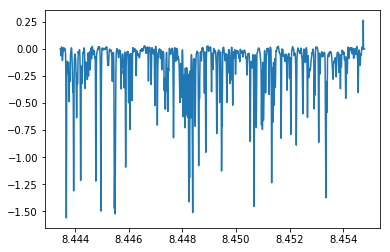

In [6]:
plt.plot(results.star_template_xs[r], results.star_template_ys[r])